<a href="https://colab.research.google.com/github/mantoan-thi/Machine-Learning-Projects-with-Python/blob/main/Analise_defeitos_Yzk_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning: Séries temporais e PMDARIMA (Autoarima)

In [ ]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
df = pd.read_csv('/content/Dataset_qualidade.csv',sep=';',encoding='latin-1')
df['Data'] = pd.to_datetime(df['Data'])
df.head(2)

,Data,Efetivo_operacional,Efetivo_poli,Qtde_faltas,Qtde_faltas_sub,Qtde_faltas_conveyor,Qtde_faltas_area_final,Alteração_na_linha,Faltas_no_turno_anterior,Temperatura,Dia_da_semana,Peças_por_hora,Takt_time,Tempo_standart,Qtde_ckt,Turno,Linha,Projeto,Processo,Código_defeito,Classificação,Descrição_do_defeito,Qtde_defeitos
0,2020-01-13,58,2,3,0,1,2,0,1,30,2,"18,0","200,5369128","3,182392",251,A,360B ERM,360B,Inspeção final,T1,B,Ramal / Saída em Posição Errada,1
1,2020-01-13,60,4,2,0,0,2,1,1,29,2,"17,6","204,6575342","3,182392",251,A,360B ERM,360B,Inspeção final,A5,B,Calha / Protetor / Capa Mal Colocado,2


In [5]:
df['Linha'].unique()

array(['360B ERM', '360B Small', '360B Eng', '360B Door', '740B door RH',
       '740B Small', '740B Eng', '740B ERM', '740B Back door',
       '740B Door LH', '740B Door RH', '740B Back Door', 'Kanjiko'],
      dtype=object)

In [6]:
# Filtrando a linha e Turno

linha = '740B ERM'
Turno = 'A'

df_linha_turno = df.loc[df.Linha == linha]
df_linha_turno = df_linha_turno.loc[df_linha_turno.Turno == Turno]
df_linha_turno.head(2)

,Data,Efetivo_operacional,Efetivo_poli,Qtde_faltas,Qtde_faltas_sub,Qtde_faltas_conveyor,Qtde_faltas_area_final,Alteração_na_linha,Faltas_no_turno_anterior,Temperatura,Dia_da_semana,Peças_por_hora,Takt_time,Tempo_standart,Qtde_ckt,Turno,Linha,Projeto,Processo,Código_defeito,Classificação,Descrição_do_defeito,Qtde_defeitos
7179,2020-02-12,60,2,4,1,1,2,0,0,29,4,"16,9","213,4285714","3,182392",251,A,740B ERM,740B,Inspeção final,B2,B,Amarre Auxiliar Faltante,1
7180,2020-02-12,59,3,3,1,2,0,1,1,30,4,"19,2","187,9245283","3,182392",251,A,740B ERM,740B,Inspeção final,E8,A,Circuito Maior que Especificado,1


In [7]:
df.columns

Index(['Data', 'Efetivo_operacional', 'Efetivo_poli', 'Qtde_faltas',
       'Qtde_faltas_sub', 'Qtde_faltas_conveyor', 'Qtde_faltas_area_final',
       'Alteração_na_linha', 'Faltas_no_turno_anterior', 'Temperatura',
       'Dia_da_semana', 'Peças_por_hora', 'Takt_time', 'Tempo_standart',
       'Qtde_ckt', 'Turno', 'Linha', 'Projeto', 'Processo', 'Código_defeito',
       'Classificação', 'Descrição_do_defeito', 'Qtde_defeitos'],
      dtype='object')

In [8]:
df_linha_turno = df_linha_turno.set_index('Data')
df_linha_turno.index = pd.to_datetime(df_linha_turno.index, format='%Y-%m-%d')
df_linha_turno = df_linha_turno[['Projeto','Qtde_defeitos']].groupby('Data').sum()
df_linha_turno.head(2)

,Qtde_defeitos
Data,
2020-02-12,17
2020-07-12,17


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

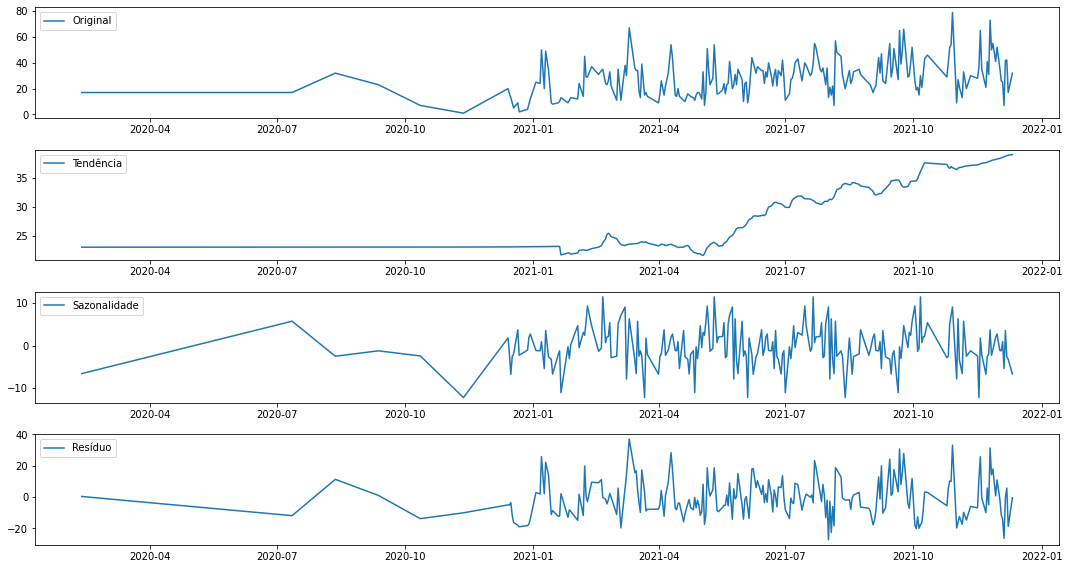

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_linha_turno,period=52,extrapolate_trend=52) 
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 
plt.gcf().set_size_inches(15, 8)
plt.subplot(411) 
plt.plot(df_linha_turno, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Tendência') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Sazonalidade') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Resíduo') 
plt.legend(loc='best') 
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


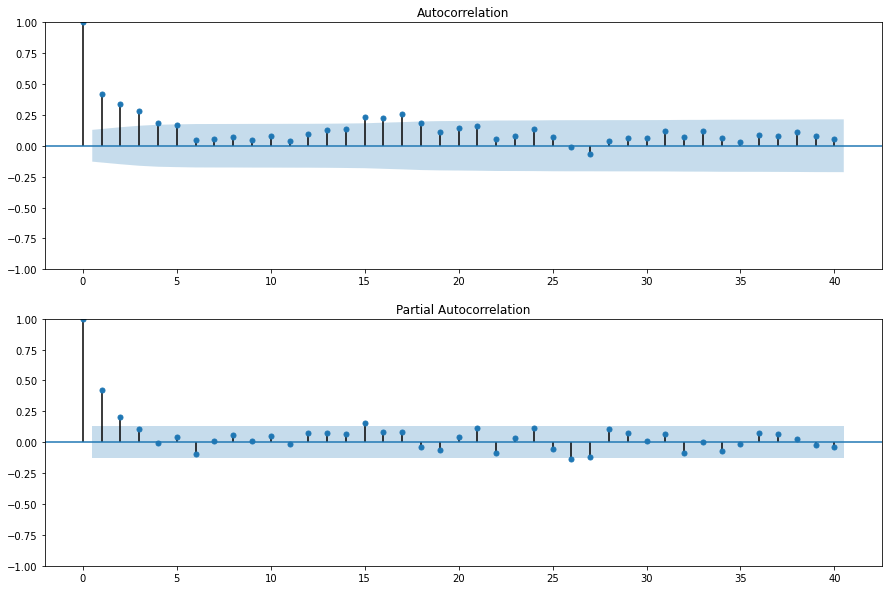

In [10]:
import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_linha_turno.values.squeeze(), lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(df_linha_turno.values.squeeze(), lags=40, ax=ax2)
plt.show();

No gráfico, o eixo vertical indica a autocorrelação e o horizontal a defasagem. A sombra em azul indica onde é significativamente diferente de zero. Como é possível ver na imagem, praticamente todos os valores ACF estão dentro do limite da sombra azul. Ou seja, autocorrelação igual a zero, indicando que a série é aleatória – conforme o esperado.

* ACF = autocorrelation function

Utilizando o pacote PMDARIMA (Autoarima)
O pacote pmdarima é utilizado para aplicar uma especie de força bruta em um modelo arima testando diversos parâmetros afim de encontrar o melhor cenário com baixo AIC. No entanto antes de começarmos vamos entender um pouco mais sobre o ARIMA.

Um modelo ARIMA significa Média Móvel integrada AutoRegressiva, ou seja este tipo de modelo trabalha com a Média Móvel diante de dados históricos para prever o futuro, diferente de alguns outros modelos o ARIMA suporta trabalhar tanto com dados sazonais como dados não sazonais, tudo isso é especificado através de uma série de parâmetros que basicamente categoriza seus dados em tendência,ruido e sazonalidade. Vamos discutir os parâmetros mais importantes do ARIMA o p,d e q.

Primeiramente o parâmetro P associado ao AR do modelo ARIMA, é o parâmetro de regressão dos dados, ou seja, é ele que procura entender como esta se comportando os dados do passado.

O segundo parâmetro D associado ao I do modelo ARIMA, é o parâmetro que busca identificar uma especie de “semelhança” nos dados, ou seja, a diferenciação entre os dados e com isso é possível saber se os dados tem uma grande variancia o que contribui com o cenário de previsão.

Por ultimo o parâmetro Q associado ao MA do modelo ARIMA, é o parâmetro da média móvel do modelo, em outras palavras ele que identificada através do calculo de média móvel a direção da tendência dos dados.

In [11]:
from pmdarima.arima import auto_arima
bruteforce_modelo = auto_arima(df_linha_turno, 
                               start_p=0, 
                               start_d=0 ,
                               start_q=0,
                               max_p=8, 
                               max_d=8,
                               max_q=8, 
                               m=7, 
                               start_P=0, 
                               seasonal=True, 
                               d=1, D=1, 
                               trace=True, 
                               error_action='ignore',
                               suppress_warnings=True, 
                               stepwise=False)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2018.929, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=1965.849, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=1.04 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=1917.819, Time=0.16 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=1.13 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=1.77 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=1968.183, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=0.94 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1896.376, Time=0.16 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=1.16 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=2.67 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=1856.842, Time=0.7

In [14]:
print(f"Resultado AIC: {bruteforce_modelo.aic()}")
print(f"Resultado melhores parametros (p,d,q): {bruteforce_modelo.order}")

Resultado AIC: 1856.8415588576704
Resultado melhores parametros (p,d,q): (0, 1, 1)


In [15]:
futuro_forecast = bruteforce_modelo.predict(n_periods=30)

In [16]:
import datetime 
dataatual = datetime.datetime.today()
dataatual = datetime.datetime.today() - datetime.timedelta(days=1)
lista_datas = [dataatual + datetime.timedelta(days=x) for x in range(30)]
lista_datas = [pd.datetime.strftime(i,'%Y-%m-%d') for i in lista_datas]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [18]:
futuro_forecast = bruteforce_modelo.predict(n_periods=30)
futuro_forecast = pd.DataFrame(futuro_forecast,index = lista_datas,columns=['Qtde_defeitos'])
futuro_forecast.index.name = 'Data'
futuro_forecast.index = pd.to_datetime(futuro_forecast.index)
futuro_forecast.cases = round(futuro_forecast.Qtde_defeitos,0)
futuro_forecast.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,Qtde_defeitos
Data,
2021-12-12,26.344016
2021-12-13,40.820162


In [19]:
final = pd.concat([df_linha_turno,futuro_forecast])
final.head(2)

,Qtde_defeitos
Data,
2020-02-12,17.0
2020-07-12,17.0


In [22]:
import plotly.graph_objects as go   
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_linha_turno.index, y=df_linha_turno.Qtde_defeitos,mode='lines+markers',
                    name='Atual'))

fig.add_trace(go.Scatter(x=futuro_forecast.index, y=futuro_forecast.Qtde_defeitos,mode='lines+markers', name='Previsto',
line=dict(dash='dashdot')))

fig.update_layout(title="Previsão para os proximos 30 dias de defeitos na linha", width=1200, height=600)
fig.show()

Testando nosso modelo.

In [46]:
dataatual = datetime.datetime.today()
dataatual = datetime.datetime.today() - datetime.timedelta(days=5)
lista_datas = [dataatual + datetime.timedelta(days=x) for x in range(5)]
lista_datas = [pd.datetime.strftime(i,'%Y-%m-%d') for i in lista_datas]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [47]:
lista_datas

['2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12']

In [48]:
df_validacao = df_linha_turno.iloc[0:-5]

In [49]:
from pmdarima.arima import auto_arima
valid_model = auto_arima(df_validacao, start_p=0, start_d=0 ,start_q=0,max_p=8, max_d=8,max_q=8, m=7, start_P=0, seasonal=False, trace=True, error_action='ignore',suppress_warnings=True, stepwise=False)

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (7) set for non-seasonal fit. Setting to 0



 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1872.505, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1805.121, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1828.068, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1817.342, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1816.393, Time=0.19 sec

In [50]:
print(f"Resultado AIC: {valid_model.aic()}")
print(f"Resultado melhores parametros (p,d,q): {valid_model.order}")

Resultado AIC: 1805.1209605539261
Resultado melhores parametros (p,d,q): (0, 1, 1)


In [51]:
valid_forecast = valid_model.predict(n_periods=5)
valid_forecast = pd.DataFrame(valid_forecast,index = lista_datas,columns=["Qtde_defeitos"])
valid_forecast.index.name = 'Data'
valid_forecast.index = pd.to_datetime(valid_forecast.index)
valid_forecast.Defeitos = round(valid_forecast.Qtde_defeitos,0)
valid_forecast.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Qtde_defeitos
Data,
2021-12-08,34.977649
2021-12-09,35.053101


In [52]:
import plotly.graph_objects as go   
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_linha_turno.index, y=df_linha_turno.Qtde_defeitos,mode='lines+markers',
                    name='Atual'))

fig.add_trace(go.Scatter(x=valid_forecast.index, y=valid_forecast.Qtde_defeitos,mode='lines+markers', name='Validação 15 dias',
line=dict(dash='dashdot')))

fig.add_trace(go.Scatter(x=futuro_forecast.index, y=futuro_forecast.Qtde_defeitos,mode='lines+markers', name='Previsto 30 dias',
line=dict(dash='dashdot')))

fig.update_layout(title="Validando eficiência do modelo com dados ja existentes.", width=1200, height=600)
fig.show()

Conforme podemos observar a previsão de 15 dias seguiu uma tendencia e não a sazonalidade dos dados originais, enquanto a previsão de 30 dias que já visualizamos anteriormente considerou a sazonalidade.

#Machine learning nos defeitos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Dataset_qualidade.csv',sep=';',encoding='latin-1')
df.drop(columns=['Data','Turno', 'Linha', 'Projeto', 'Processo', 'Código_defeito',
       'Classificação', 'Descrição_do_defeito'],inplace=True)
df.head(2)

,Efetivo_operacional,Efetivo_poli,Qtde_faltas,Qtde_faltas_sub,Qtde_faltas_conveyor,Qtde_faltas_area_final,Alteração_na_linha,Faltas_no_turno_anterior,Temperatura,Dia_da_semana,Peças_por_hora,Takt_time,Tempo_standart,Qtde_ckt,Qtde_defeitos
0,58,2,3,0,1,2,0,1,30,2,"18,0","200,5369128","3,182392",251,1
1,60,4,2,0,0,2,1,1,29,2,"17,6","204,6575342","3,182392",251,2


In [ ]:
df = df.replace({',': '.'}, regex=True)

In [ ]:
df.describe()

,Efetivo_operacional,Efetivo_poli,Qtde_faltas,Qtde_faltas_sub,Qtde_faltas_conveyor,Qtde_faltas_area_final,Alteração_na_linha,Faltas_no_turno_anterior,Temperatura,Dia_da_semana,Qtde_ckt,Qtde_defeitos
count,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000
mean,48.409064,2.415664,3.013257,1.006373,1.004182,1.002703,0.498421,0.498649,30.499104,4.191147,207.618702,1.038434
std,14.083804,1.183141,1.412037,0.813166,0.817525,0.816556,0.500005,0.500005,1.116356,1.538364,75.164999,0.327631
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,2.000000,5.000000,1.000000
25%,34.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.000000,167.000000,1.000000
50%,56.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,30.000000,4.000000,251.000000,1.000000
75%,58.000000,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,31.000000,5.000000,251.000000,1.000000
max,60.000000,4.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,32.000000,7.000000,251.000000,18.000000


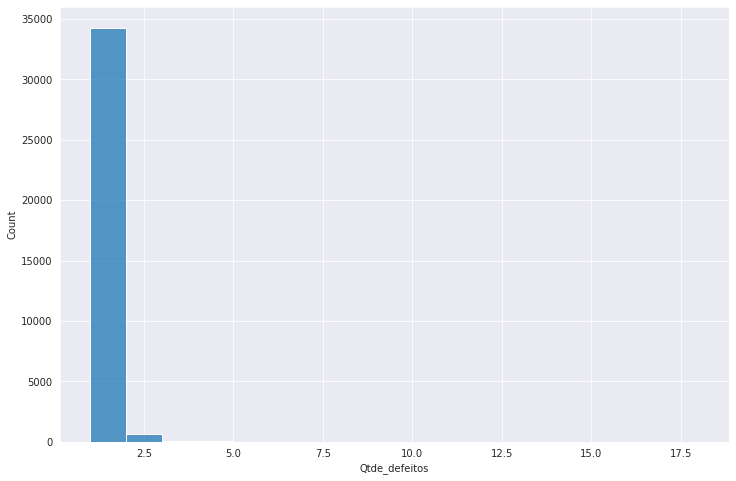

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.histplot(df.Qtde_defeitos)

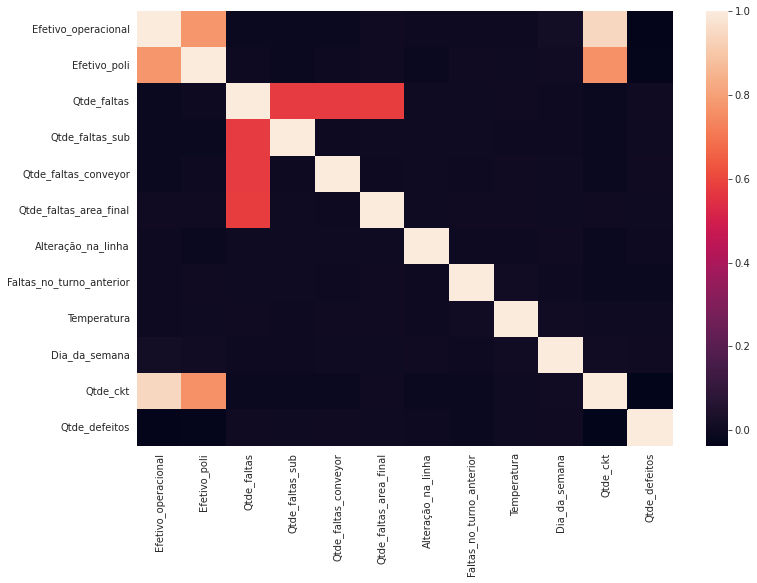

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

A nossa intenção e saber o grau de correlação das variáveis com a variável que queremos prever('Qtde_defeitos'), então podemos simplesmente filtrar a coluna com essas informações.

In [ ]:
correlations = df.corr()
correlations['Qtde_defeitos']

Efetivo_operacional        -0.030215
Efetivo_poli               -0.026022
Qtde_faltas                 0.003511
Qtde_faltas_sub             0.001430
Qtde_faltas_conveyor        0.005667
Qtde_faltas_area_final     -0.001026
Alteração_na_linha         -0.001800
Faltas_no_turno_anterior   -0.006716
Temperatura                 0.002855
Dia_da_semana               0.004615
Qtde_ckt                   -0.037610
Qtde_defeitos               1.000000
Name: Qtde_defeitos, dtype: float64

Utilizando Machine Learning para realizar a previsão

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[0:,0:-1],df['Qtde_defeitos'], test_size=0.5, random_state=27)

In [ ]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
resultado = model.predict(X_test)
mse = mean_squared_error(y_test, resultado)
scr = model.score(X_test,y_test)
print('MSE: ',round(mse,2))
print('Accuracy: {:.2%}'.format(scr))

MSE:  0.12
Accuracy: 0.08%


In [ ]:
resultado_treino = model.predict(X_train)
mse_t  = mean_squared_error(y_train, resultado_treino)
scr_t = model.score(X_train,y_train)
print('MSE: ',round(mse_t,2))
print('Accuracy: {:.2%}'.format(scr_t))

MSE:  0.09
Accuracy: 0.21%


Nesse primeiro modelo temos um erro muito alto e um valor de score muito baixo, esses resultados não são nem um pouco satisfatórios.

Um dos motivos é que temos muitos dados binários no conjunto de dados (0 e 1), os modelos de regressão linear tendem a funcionar melhor quando temos dados numéricos contínuos.

Os modelos de árvore apresentam melhores resultados, vamos ver a seguir se essa premissa se confirma.

In [ ]:
tree = DecisionTreeRegressor()
model_tree = tree.fit(X_train,y_train)
resultado_tree = tree.predict(X_test)
mse = mean_squared_error(y_test, resultado_tree)
scr = model_tree.score(X_test,y_test)
print('MSE: ',round(mse,2))
print('Accuracy: {:.2%}'.format(scr))

MSE:  0.31
Accuracy: -147.33%


In [ ]:
tree_rf = RandomForestRegressor()
model_rf = tree_rf.fit(X_train, y_train)
resultado_rf = model_rf.predict(X_test)
mse = mean_squared_error(y_test, resultado_rf)
scr = model_rf.score(X_test,y_test)
print('MSE: ',round(mse,2))
print('Accuracy: {:.2%}'.format(scr))

MSE:  0.14
Accuracy: -13.17%


Ajustando os hiperparametros do Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}

rf = RandomForestRegressor()
grid = GridSearchCV(rf, parametros)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 10],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 250, 500, 750]})

In [ ]:
# Verificando os melhores parâmetros:
grid.best_params_

{'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 750}

In [ ]:
# Recuperando o melhor estimator:
rf_best = grid.best_estimator_

In [ ]:
# Gerando o resultado final:
resultado_final = rf_best.predict(X_test)
mse = mean_squared_error(y_test, resultado_final)
scr = rf_best.score(X_test,y_test)
print('MSE: ',round(mse,2))
print('Accuracy: {:.2%}'.format(scr))

MSE:  0.13
Accuracy: -0.80%


# Previsão de defeitos

In [ ]:
!pip install squarify

In [ ]:
import pandas as pd                           # Manipulação de dados
import glob                                   # Importação de dados
import re                                     # Expressões regulares
import itertools                              # Ferramenta iteração
import numpy as np                            # Computação científica
import statsmodels.api as sm                  # Modelagem estatística
import seaborn as sns                         # Visualização de dados
import squarify                               # Visualização de treemaps

import matplotlib.pyplot as plt               # Visualização de dados
import matplotlib
plt.style.use('fivethirtyeight') 

import  plotly.express  as  px

import plotly.tools as tls                    # Ferramentas do plotly

import folium                                 # Visualização de mapas
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

import warnings                               # Ignorar warnings
warnings.filterwarnings("ignore")

In [ ]:
# FUNÇÃO PARA IMPORTAR DATASET
df = pd.read_csv('/content/Dataset_qualidade.csv',sep=';',encoding='latin-1')
df.drop(columns=['Turno', 'Linha', 'Projeto', 'Processo', 'Código_defeito',
                 'Classificação', 'Descrição_do_defeito'],inplace=True)
df = df.replace({',': '.'}, regex=True)
df['Data']=pd.to_datetime(df['Data'])

In [ ]:
df.columns

Index(['Data', 'Efetivo_operacional', 'Efetivo_poli', 'Qtde_faltas',
       'Qtde_faltas_sub', 'Qtde_faltas_conveyor', 'Qtde_faltas_area_final',
       'Alteração_na_linha', 'Faltas_no_turno_anterior', 'Temperatura',
       'Dia_da_semana', 'Peças_por_hora', 'Takt_time', 'Tempo_standart',
       'Qtde_ckt', 'Qtde_defeitos'],
      dtype='object')

In [ ]:
ocorrencias = df.groupby('Data').count()['Qtde_defeitos'].reset_index()

fig  =  px.line(ocorrencias, x = "Data",y ='Qtde_defeitos', title = 'Quantidade de Defeitos' ) 
fig.show()

In [ ]:
ocorrencias

,Data,Qtde_defeitos
0,2020-01-07,100
1,2020-01-08,22
2,2020-01-09,19
3,2020-01-10,58
4,2020-01-12,35
...,...,...
437,2021-12-05,94
438,2021-12-06,112
439,2021-12-07,184
440,2021-12-08,195


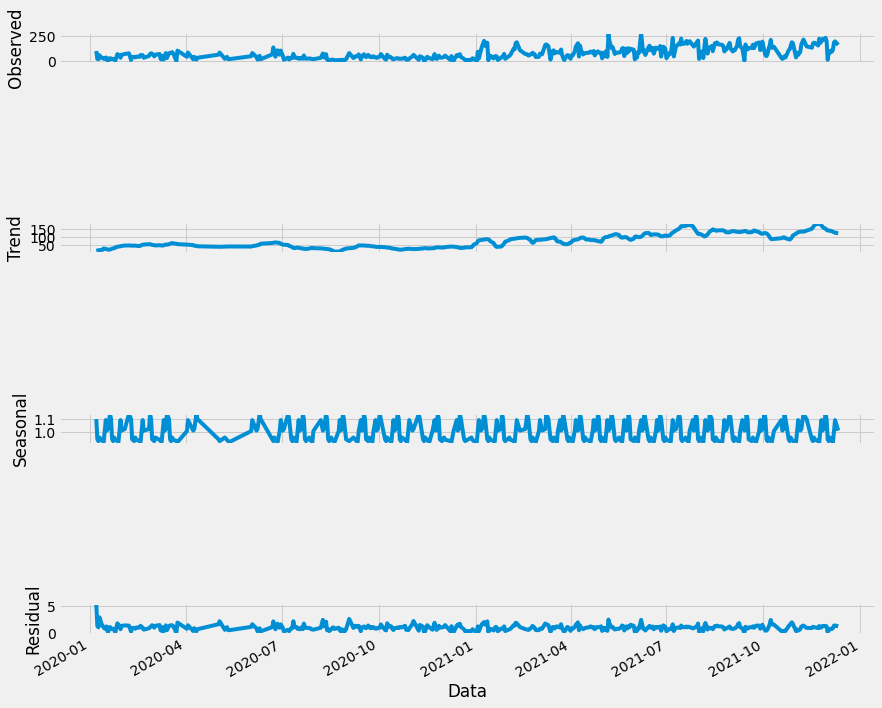

In [ ]:

# TRANSFORMANDO SÉRIE TEMPORAL

ocorrencias.index =  ocorrencias.Data
ocorrencias.drop(columns='Data', inplace=True)
ocorrencias.index = pd.to_datetime(ocorrencias.index)

# IMPORTANDO BIBLIOTECAS

from statsmodels.tsa.seasonal import seasonal_decompose

# DECOMPOSIÇÃO DA SÉRIE TEMPORAL

result = seasonal_decompose(ocorrencias, model='multiplicative',extrapolate_trend=12,freq=12)
g = result.plot()
g.set_figwidth(14)
g.set_figheight(14)

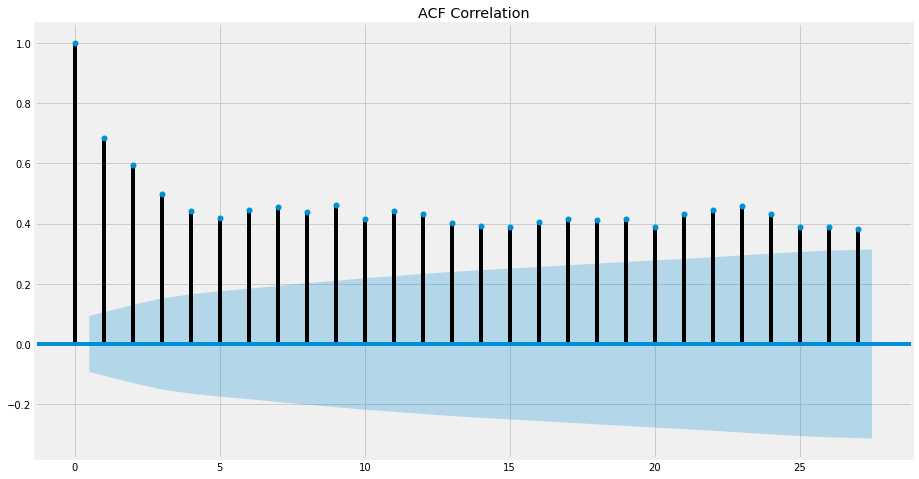

In [ ]:
# IMPORTANDO BIBLIOTECAS

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# PLOT DE CORRELAÇÃO ACF

g = plot_acf(ocorrencias, title="ACF Correlation")
g.set_figheight(8)
g.set_figwidth(14)

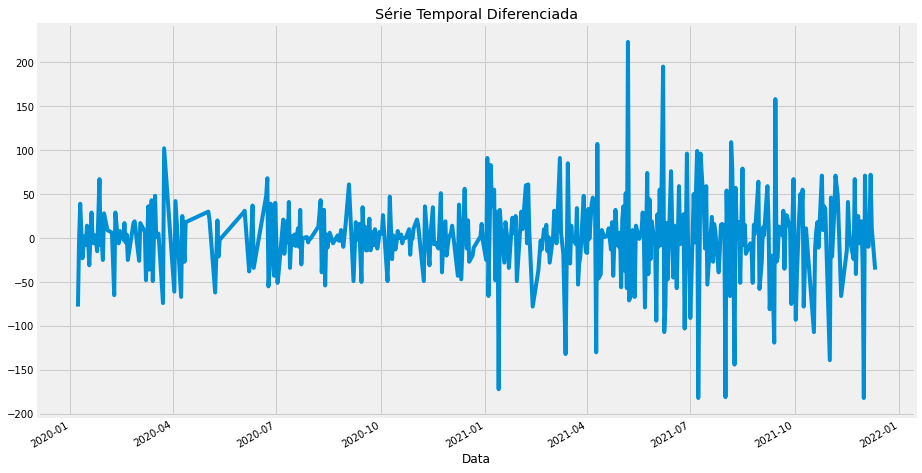

In [ ]:
# DIFERENCIANDO SÉRIE TEMPORAL

ocorrencias_diff = ocorrencias.diff(periods=1)
ocorrencias_diff = ocorrencias_diff[1:]

# PLOT DA SÉRIE TEMPORAL DIFERENCIADA COM D = 1

g = ocorrencias_diff.plot(figsize=(14,8), title="Série Temporal Diferenciada", legend=False)

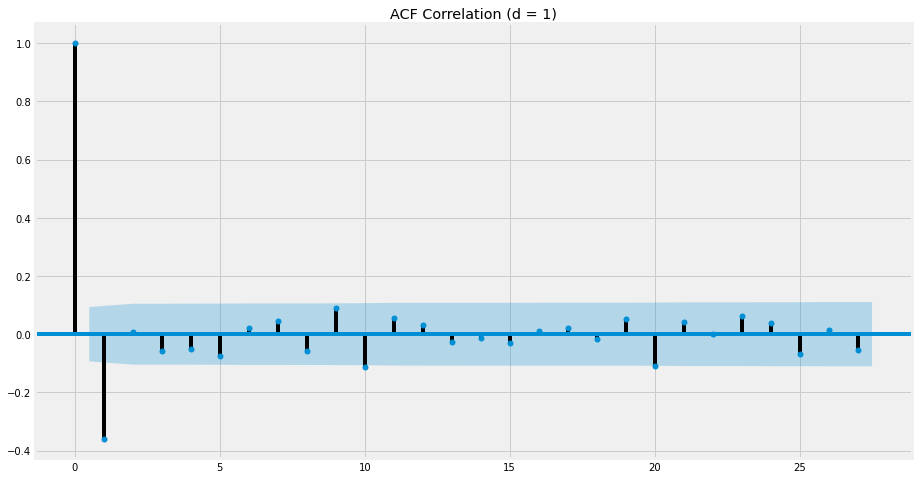

In [ ]:

# PLOT CORRELAÇÃO ACF

g = plot_acf(ocorrencias_diff, title="ACF Correlation (d = 1)")
g.set_figheight(8)
g.set_figwidth(14)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/pyth

Melhoers parâmetros:  ((1, 1, 13), (1, 1, 3, 12))  AUC:  3927.7274229898107


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



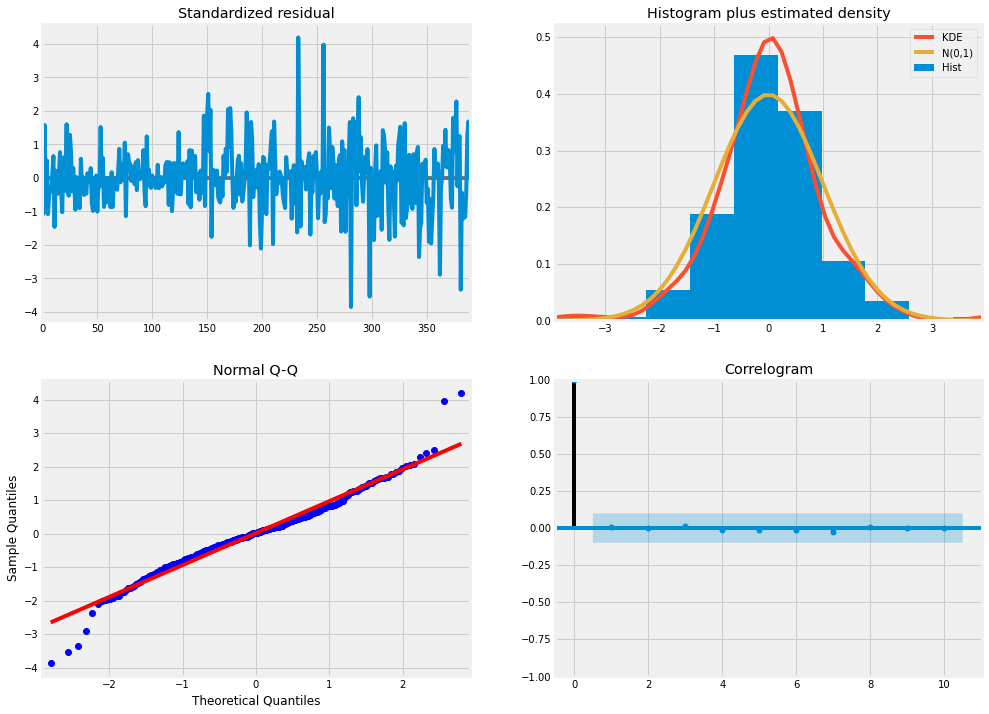

In [ ]:
# DEFINE COMBINAÇÕES ENTRE p DE 0 A 3, d = 1, e q = 13
pdq = [(p, 1, 13) for p in range(0, 4)]

# DEFINE P e Q ENTRE 0 e 3
P = Q = range(0, 4)

# DEFINE COMBINAÇÕES ENTRE P, D e Q
seasonal_pdq = [(x[0], 1, x[1], 12) for x in list(itertools.product(P, Q))]

# CALCULANDO O MELHOR PARÂMETRO PARA O MODELO

scores = {}

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ocorrencias,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            scores[param, param_seasonal] = results.aic
            
        except:
            continue
            
print("Melhoers parâmetros: ", min(scores, key=scores.get)," AUC: ", min(scores.values()))

# CRIANDO MODELO COM OS MELHOERS PARÂMETROS 

mod = sm.tsa.statespace.SARIMAX(ocorrencias,
                                order=(3, 1, 13),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

# RESUMO DO MODELO

results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# VALIDAÇÃO DO MODELO: PREVENDO OCORRÊNCIAS A PARTIR DE 2017

pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = ocorrencias['2020':].plot(figsize=(14, 8))
pred.predicted_mean.plot(ax=ax, label='Previsão', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_title("Previsão de defeitos", fontsize=18)
ax.set_xlabel('Data')
ax.set_ylabel('Qtde_defeitos')
plt.legend()

plt.show()

# CALCULANDO MSE

y_forecasted = pred.predicted_mean
y_truth = ocorrencias["2021-01-01":].squeeze()

mse = ((y_forecasted - y_truth) ** 2).mean()

print('O Mean Squared Error da previsão foi {}'.format(round(mse)))

In [ ]:
# PREVENDO OCORRÊNCIAS PARA OS PRÓXIMOS TRÊS ANOS

pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()

ax = ocorrencias['2020':].plot(figsize=(14, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Previsão')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_title("Previsão de Ocorrências de defeitos", fontsize=18)
ax.set_xlabel('Data')
ax.set_ylabel('Qtde_defeitos')

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f7e001d85f0> (for post_execute):


ValueError: ignored

ValueError: ignored